## Library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.compat.v1 import set_random_seed
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv2D, LSTM, Dense, Flatten, MaxPooling2D, TimeDistributed
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from matplotlib import rcParams

In [22]:
rcParams["font.family"] = "Times New Roman"
rcParams.update({'font.size': 14})

## Prerpocessing

In [3]:
def window_data(df, window, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window),].T.values
        target = df.iloc[(i + window), target_col_number]
        #print(features)
        #print("----")
        #print(target)
        X.append(features)
        y.append(target)
    return np.array(X).astype(float), np.array(y).astype(np.float64).reshape(-1, 1)
def shaping(data):
    return data.reshape(data.shape[0], data.shape[1],data.shape[2], 1)
def NaN_initiate(df,percentage,target_columns):
    for col in df.columns:
        df.loc[df.sample(frac=percentage).index,col]=0

In [4]:
df=pd.read_excel('Data_newalls.xlsx', index_col=[0], parse_dates=[0])
df=df.fillna(0)

In [5]:
perc=0
length=844
df=df[:length]
NaN_initiate(df[:670],perc,8)
window_size=1
X, y=window_data(df,window_size, 8)

In [6]:
split = int(0.8 * len(X))
X_train = X[: split - 1]
X_test = X[split:]

y_train = y[: split - 1]
y_test = y[split:]

#Shaping
X_train=shaping(X_train)
X_test=shaping(X_test)

In [7]:
X_train.shape

(672, 9, 1, 1)

## CNN 

In [8]:
set_random_seed(1)
#Model 1
model1 = Sequential()
# model1.add(Dropout(0.2))
model1.add(Conv2D(7, (2,2), activation='relu',padding='same'))
model1.add(MaxPooling2D((2,2),padding='same'))
# model1.add(Dropout(0.2))
model1.add(TimeDistributed(Flatten()))
# model1.add(RepeatVector(1))
model1.add(LSTM(10, return_sequences=False))
# model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(1000, activation ='relu'))
model1.add(Dense(100))
# model1.add(Dropout(0.2))
model1.add(Dense(1))
model1.compile(loss='mse', optimizer='adam')

#Model 2

model2 = Sequential()
# model2.add(Dropout(0.2))
model2.add(Conv2D(32, (2,2), activation='relu',padding='same'))
model2.add(MaxPooling2D((2,2),padding='same'))
# model2.add(Dropout(0.2))
model2.add(TimeDistributed(Flatten()))
# model2.add(RepeatVector(1))
model2.add(LSTM(10, return_sequences=False ))
# model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(1000, activation ='relu'))
model2.add(Dense(100))
# model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='adam')

#Model 3
model3 = Sequential()
# model3.add(Dropout(0.2))
model3.add(Conv2D(16, (2,2),activation='relu',padding='same'))
model3.add(MaxPooling2D((2,2),padding='same'))
# model3.add(Dropout(0.2))
model3.add(Conv2D(32, (2,2), activation='relu', padding='same'))
model3.add(MaxPooling2D((2,2),padding='same'))
# model3.add(Dropout(0.2))
model3.add(TimeDistributed(Flatten()))
# model3.add(RepeatVector(1))
model3.add(LSTM(10, return_sequences=False ))
# model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(1000, activation='relu'))
model3.add(Dense(100))
# model3.add(Dropout(0.2))
model3.add(Dense(1))
model3.compile(loss='mse', optimizer='adam')

#Model 4

model4 = Sequential()
# model4.add(Dropout(0.2))
model4.add(Conv2D(16, (2,2), padding='same',activation='relu'))
model4.add(MaxPooling2D((2,2),padding='same'))
# model4.add(Dropout(0.2))
model4.add(Conv2D(64, (2,2), activation='relu', padding='same'))
model4.add(MaxPooling2D((2,2),padding='same'))
# model4.add(Dropout(0.2))
model4.add(Conv2D(32, (2,2), activation='relu', padding='same'))
model4.add(MaxPooling2D((2,2),padding='same'))
# model4.add(Dropout(0.2))
model4.add(TimeDistributed(Flatten()))
# model4.add(RepeatVector(1))
model4.add(LSTM(10, return_sequences=False ))
# model4.add(Dropout(0.2))
model4.add(Flatten())
model4.add(Dense(1000, activation ='relu'))
model4.add(Dense(100))
# model4.add(Dropout(0.2))
model4.add(Dense(1))
model4.compile(loss='mse', optimizer='adam')

#Model 5

model5 = Sequential()
# model5.add(Dropout(0.2))
model5.add(Conv2D(16, (2,2), activation='relu',padding='same'))
model5.add(MaxPooling2D((2,2),padding='same'))
# model5.add(Dropout(0.2))
model5.add(Conv2D(64, (2,2), activation='relu', padding='same'))
model5.add(MaxPooling2D((2,2),padding='same'))
# model5.add(Dropout(0.2))
model5.add(Conv2D(64, (2,2), activation='relu', padding='same'))
model5.add(MaxPooling2D((2,2),padding='same'))
# model5.add(Dropout(0.2))
model5.add(Conv2D(32, (2,2), activation='relu', padding='same'))
model5.add(MaxPooling2D((2,2),padding='same'))
# model5.add(Dropout(0.2))
model5.add(TimeDistributed(Flatten()))
# model5.add(RepeatVector(1))
model5.add(LSTM(10, return_sequences=False ))
# model5.add(Dropout(0.2))
model5.add(Flatten())
model5.add(Dense(1000, activation ='relu'))
model5.add(Dense(100))
# model5.add(Dropout(0.2))
model5.add(Dense(1))
model5.compile(loss='mse', optimizer='adam')

In [9]:
set_random_seed(1)
history1=model1.fit(X_train, y_train, verbose=0, epochs=50,batch_size=None)
history2=model2.fit(X_train, y_train, verbose=0, epochs=50,batch_size=None)
history3=model3.fit(X_train, y_train, verbose=0, epochs=50,batch_size=None)
history4=model4.fit(X_train, y_train, verbose=0, epochs=50,batch_size=None)
history5=model5.fit(X_train, y_train, verbose=0, epochs=50,batch_size=None)

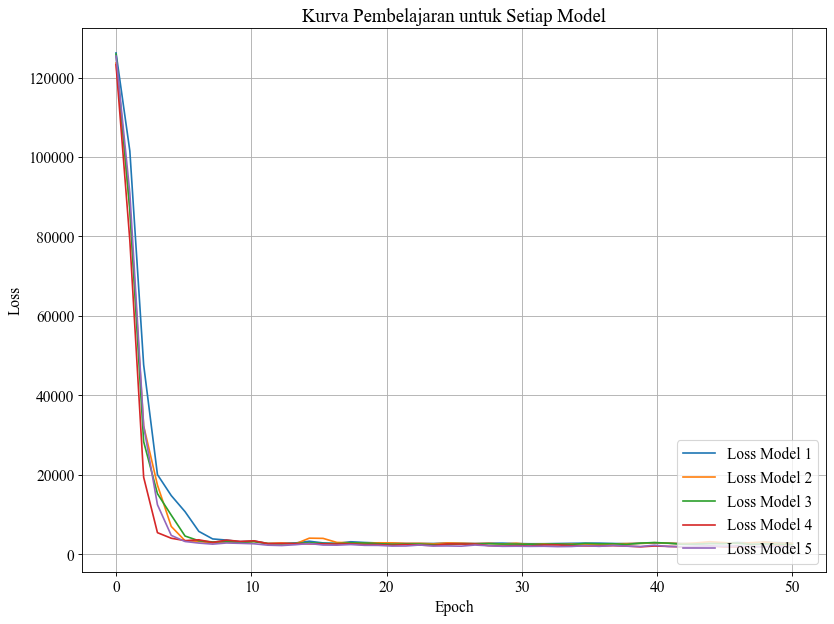

In [24]:
plt.figure(figsize=(12,9), dpi=80)
plt.title("Kurva Pembelajaran untuk Setiap Model")
x=np.linspace(0,len(np.array(history1.history['loss'])),len(np.array(history1.history['loss'])))
plt.plot(x, (np.array(history1.history['loss'])), label='Loss Model 1')
plt.plot(x, (np.array(history2.history['loss'])), label='Loss Model 2')
plt.plot(x, (np.array(history3.history['loss'])), label='Loss Model 3')
plt.plot(x, (np.array(history4.history['loss'])), label='Loss Model 4')
plt.plot(x, (np.array(history5.history['loss'])), label='Loss Model 5')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid()
# plt.savefig('history_1.png')

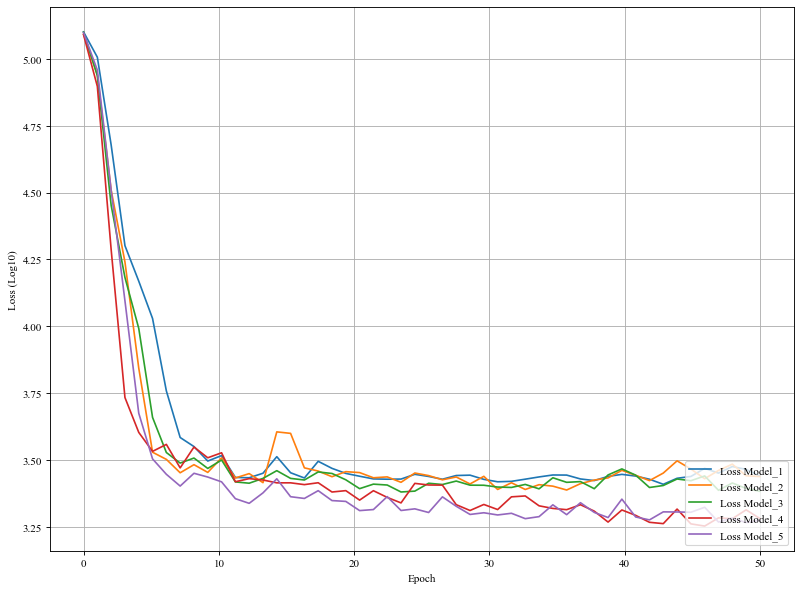

In [11]:
plt.figure(figsize=(12,9), dpi=80)
x=np.linspace(0,len(np.array(history1.history['loss'])),len(np.array(history1.history['loss'])))
plt.plot(x, (np.array(np.log10(history1.history['loss']))), label='Loss Model_1')
plt.plot(x, (np.array(np.log10(history2.history['loss']))), label='Loss Model_2')
plt.plot(x, (np.array(np.log10(history3.history['loss']))), label='Loss Model_3')
plt.plot(x, (np.array(np.log10(history4.history['loss']))), label='Loss Model_4')
plt.plot(x, (np.array(np.log10(history5.history['loss']))), label='Loss Model_5')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log10)')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid()
# plt.savefig('history_1.png')

In [12]:
# set_random_seed(1)
yhat1=model1.predict(X_test,verbose=0)
yhat2=model2.predict(X_test,verbose=0)
yhat3=model3.predict(X_test,verbose=0)
yhat4=model4.predict(X_test,verbose=0)
yhat5=model5.predict(X_test,verbose=0)

In [13]:
mape1=mean_absolute_percentage_error(y_test,yhat1)
mape2=mean_absolute_percentage_error(y_test,yhat2)
mape3=mean_absolute_percentage_error(y_test,yhat3)
mape4=mean_absolute_percentage_error(y_test,yhat4)
mape5=mean_absolute_percentage_error(y_test,yhat5)
# mape_ppca=mean_absolute_percentage_error(y_test[-12:],ppca)

# yhat1=yhat1.reshape(-1,)
# yhat2=yhat2.reshape(-1,)
# yhat3=yhat3.reshape(-1,)
# yhat4=yhat4.reshape(-1,)
# yhat5=yhat5.reshape(-1,)
# y_test=y_test.reshape(-1,)
# mape1=mean_absolute_percentage_error(y_test[-96:],yhat1[-96:])
# mape2=mean_absolute_percentage_error(y_test[-96:],yhat2[-96:])
# mape3=mean_absolute_percentage_error(y_test[-96:],yhat3[-96])
# mape4=mean_absolute_percentage_error(y_test[-96:],yhat4[-96:])
# mape5=mean_absolute_percentage_error(y_test[-96:],yhat5[-96:])

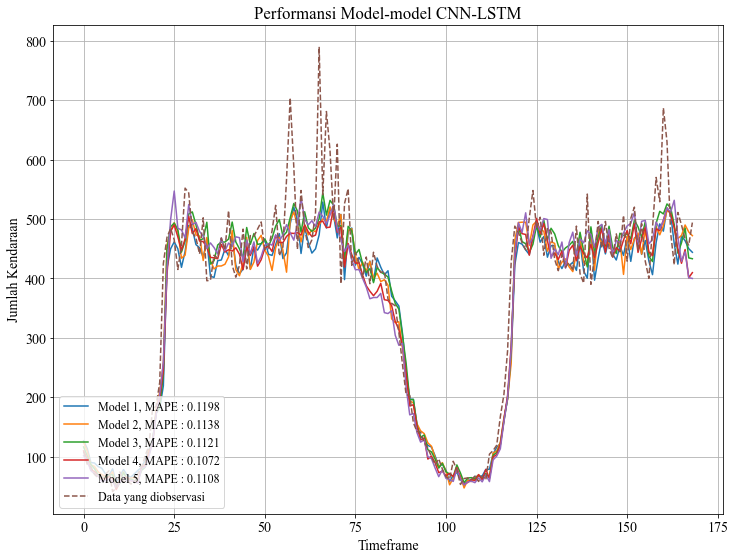

In [25]:
plt.figure(figsize=(12,9))
plt.title("Performansi Model-model CNN-LSTM")
plt.plot(np.squeeze(yhat1), label='Model 1, MAPE : %.4f' %(mape1))
plt.plot(np.squeeze(yhat2), label='Model 2, MAPE : %.4f' %(mape2))
plt.plot(np.squeeze(yhat3), label='Model 3, MAPE : %.4f' %(mape3))
plt.plot(np.squeeze(yhat4), label='Model 4, MAPE : %.4f' %(mape4))
plt.plot(np.squeeze(yhat5), label='Model 5, MAPE : %.4f' %(mape5))
plt.plot(y_test[:,0],'--', label='Data yang diobservasi')
# plt.plot(y_train[:,0], '--',label ='Data yang diobservasi (Minggu Lalu)')
plt.xlabel("Timeframe")
plt.ylabel("Jumlah Kendaraan")
# plt.plot(x1,dataset[:,7], label="test")
plt.legend(prop={'size': 12},loc='lower left')
plt.grid()
# plt.savefig("evaluation_3.png")
plt.show()

In [15]:
# CNN_LSTM=pd.DataFrame({'Test': y_test[:,0], 'Model 1': yhat1.reshape(-1,), 'Model 2': yhat2.reshape(-1,), 'Model 3': yhat3.reshape(-1,), 'Model 4': yhat4.reshape(-1,), 'Model 5': yhat5.reshape(-1,)})
# CNN_LSTM.to_excel('CNN-LSTM.xlsx')